**KEGGLE COMPETITION - TITANIC SURVIVAL PREDICTION**
**OBBIETTIVO:** *PREVEDERE TRAMITE UNA CLASSIFICAZIONE SE UN IMBARCATO SOPRAVVIVE O NO*

FASI TIPICHE PER LA CREAZIONE DI UN MODELLO:

1) CAPIRE IL PROBLEMA, PENSARE A POSSIBILI SOLUZIONI
2) IMPORTARE LE LIBRERIE UTILI E CHE SERVIRANNO PER IL MODELLO E SOLUZIONE
3) IMPORTARE IL DATASET (TRAIN DATASET)
4) ESPLORARE E ANALIZZARE IL DATASET (SE POSSIBILE TROVARE CORRELAZIONE TRA I DATI, TROVARE E MODIFICARE DATI MANCANTI)
5) CLEANING DEL DATASET DA DATI SPORCHI,RIDONDANDI, RUMOROSI, INDIFFERENTI
6) SCELTA E CREAZIONE DI UN MODELLO O + MODELLI PER IL TRANING
7) PREDIZIONI E VALUTAZIONI - MIGLIORAMENTO DATI E MODELLO SE NECESSARIO; LA VALUTAZIONE DEVE ESSERE CALCOLATA TRAMITE L'ACCURATEZZA
8) TESTING DEL MODELLO PER IL DATASET NON ALLENATO OSSIA DI TEST
9) SUBMISSION 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import io
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
#IMPORT DEL DATASET ED ESPLORAZIONE DI ESSO
from google.colab import files
upload = files.upload()

Saving train.csv to train.csv


In [ ]:
dtrain = pd.read_csv(io.BytesIO(upload['train.csv']))
dtrain.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
#ESPLORAZIONE DATASET
print(dtrain.shape) #dimensione data set righe (input ossia i passeggeri) x colonne
dtrain.info()

(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


NEL DATASET ABBIAMO VALORI SIA NUMERICI, CONTINUI, STRING(ALFANUMERICI) E CATEGORICI(In maggioranza). SI NOTA CHE NON TUTTE LE COLONNE DEGLI ATTRIBUITI DEGLI INPUT HANNO TUTTI I VALORI: TRA QUESTE PRINCIPALMENTE MANCANO ETà E CABINA.
A QUESTO PUNTO è IMPORTANTE CAPIRE SE QUESTI DATI SONO IMPORTANTI PER LA PREVISIONE FINALE, E QUINDI CAPIRE COME EVENTUALMENTE SOSTITUIRLI IN MODO CORRETTO OPPURE SCARTARE INTERAMENTE L'INPUT

In [ ]:
#check presenza e conteggio dei valori mancanti o rumorosi
dtrain.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

SI CONTINUA AD ESPLORARE IL DATASET, BISOGNA CAPIRE L'IMPORTANZA DEI DATI E SE SONO CORRELATI TRA DI LORO.
ANDANDO IN ORDINE:
1) PASSENGERID NON INFLUENTE
2) SURVIVED è IL TARGET FINALE
3) PCLASS ?
4) IL NAME NON è DETERMINAMENTE, PUò ESSERE DI SUPPORTO
5) IL SEX PUò SERVIRE, CAPIRE CHI TRA I DUE SESSI è SOPRAVVISUTO DI PIU?
6) SIBSP è IL NUMERO DI FRATELLI, PUò FORSE SERVIRE
7) PARCH E TICKET E FARE E CABIN NO
8) EMBARKED FORSE UTILE A SCOPO STATISTICO?


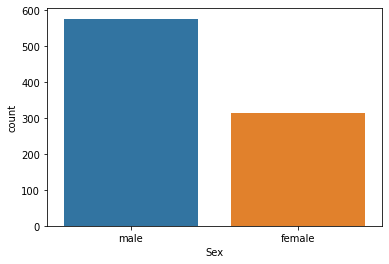

In [ ]:
plot_count = sns.countplot(x="Sex", data=dtrain)

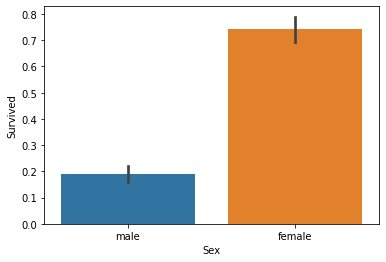

In [ ]:
#PLOTTING DEI VALORI CATEGORICI IN CONFRONTO CON IL TARGET, SEX E EMBARKED -> SURVIVED
plot_sex = sns.barplot(x='Sex', y='Survived', data = dtrain)

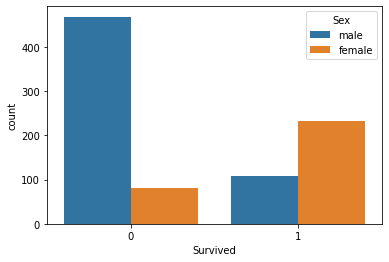

In [ ]:
plot_count = sns.countplot(x="Survived",hue="Sex", data=dtrain)

SI NOTA CHE SONO SOPRAVVISSUTI IN MAGGIORANZA PIù DONNE CHE UOMINI

INTERESSANTE è FARE UN CONFRONTO ANCHE IN BASE ALL'ETA, ALL'ETA PER GLI UOMINI: CAPIRE SE L'ETA è DETERMINANTE PER GLI UOMINI (AD ESEMPIO SE ETA GIOVANI, QUINDI BAMBINI, SONO QUELLI CHE INFLUENZANO DI PIù LA CATEGORIA SURVIVED PER GLI UOMINI.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Età media: 29.69911764705882
Età minima: 0.42
Età massima: 80.0


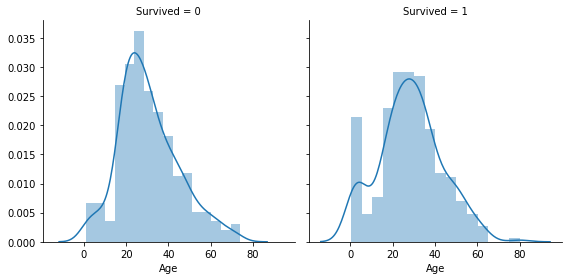

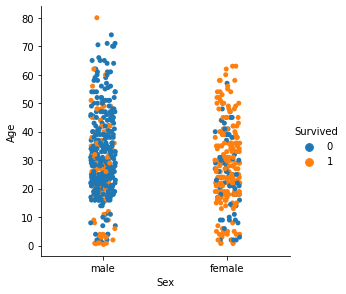

In [ ]:
plot_age = sns.FacetGrid(dtrain, col="Survived", height=4)
plot_age = plot_age.map(sns.distplot, "Age")
plot_age_man = sns.catplot(x="Sex", y="Age", hue="Survived", data=dtrain, height=4)
print('Età media:',dtrain["Age"].mean())
print('Età minima:',dtrain["Age"].min())
print('Età massima:',dtrain["Age"].max())

SI NOTA COME PERSONE GIOVANI HANNO UNA PROBABILITà PIU ALTA DI SALVARSI RISPETTO A QUELLI PIU ANZIANI. PER GLI UOMINI LA SOPRAVVIVENZA è PIU ALTA PER UN ETA MINORE INFANTILE, MENTRE PER GLI ADULTI IL CONTRARIO

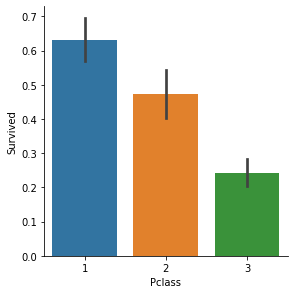

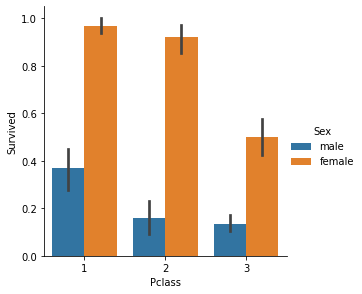

In [ ]:
#CHECK PER LA FEATURES PCLASS
plot_class= sns.catplot(x = "Pclass", y="Survived", data=dtrain, height=4, kind="bar")
#SI NOTA CHE UNA CLASSE PIU ALTA HA PIU CHANGE DI SOPRAVVIVENZA
plot_class_sex = sns.catplot(x="Pclass", y="Survived", hue="Sex", data=dtrain, height=4, kind="bar")

ANCHE CONFRONTANTO LE PCLASS, SI NOTA CHE LE FEMMINE SONO SEMPRE COLORO CHE RIESCONO HA AVERE PIU PROB DI SOPRAVVIVENZA

numero parenti min: 0 
numero parenti max: 8


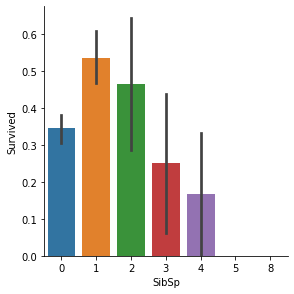

In [ ]:
#CHECK SIBSP OSSIA NUMERO DI FRATELLI E DI COPPIE SPOSATE. IN SOSTANZA è IL CONTEGGIO CHE CONTA QUANTI PARENTI
#HA UN INPUT, OSSIA UNA PERSONA, NELLA BARCA
print('numero parenti min:', dtrain["SibSp"].min(), '\nnumero parenti max:', dtrain["SibSp"].max())
dtrain["SibSp"].unique()

plot_sibsp = sns.catplot(x="SibSp", y="Survived", data=dtrain, height=4, kind="bar")

PERSONE CHE HANNO TRA 0 E I 3 PARENTI HANNO PIU CHANGE DI SALVARSI. IN PARTICOLARE TRA GLI 1 E 2 PARENTI

In [ ]:
#CHECK ULTERIORE(NON ESSENZIALE) SUGLI INBARCHI
print(dtrain["Embarked"].unique())
#PER QUESTA FEATURES SI HA 2 VALORI MANCANTI, MA NON è MOLTO IMPORTANTE
#POSSONO ESSERE TAGLIATI GLI INPUT O POSSONO ESSERE AGGIUNTI SECONDO DEI CRITERI:
#1)ASSEGNAZIONE CATEGORIA IN MAGGIORANZA NEL DATASET
#2)ASSEGNAZIONE SECONDO UN CRITERIO: ES ASSEGNARLO ALLO STESSO DI UN SUO PARENTE SE è PRESENTE, ECC...
#3)ASSEGNAZIONE TRAMITE CALCOLO STATISTICO
print(dtrain["Embarked"].value_counts())

['S' 'C' 'Q' nan]
S    644
C    168
Q     77
Name: Embarked, dtype: int64


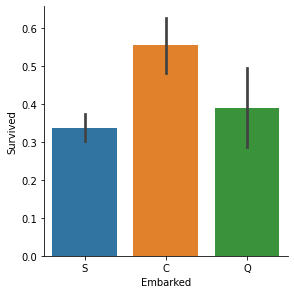

In [ ]:
plot_embarked = sns.catplot(data= dtrain, x="Embarked", y="Survived", height=4, kind="bar")

PULIZIA DATI E COMPLETAMENTO/RIMOZIONE DATI RUMOROSI-MANCATI

In [ ]:
print(dtrain.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


PER LE FEATURES DI CABIN NON VENGONO EFFETTUATE OPERAZIONI IN QUANTO NON SONO IMPORTANTI PER LA CLASSIFICAZIONE, INFATTI QUELLA FEATURES VERRà DROPPATA. IN ALTERNATIVA PER EVITARE IL DROPPING, SI PUò EFFETTUARE UN INPUT RANDOM 

IDEA SOLUZIONE PER VALORI MANCANTI DELL'ETA: ASSEGNAZIONE DELL'ETA ALL'INPUT IN RAPPORTO ALLA MEDIA DELL'ETA CHE L'INPUT è CATERGORIZZATO NELLE ALTRE IMPORTANTI FEATURES (QUELLE CHE POSSONO PORTARE VALIDE ASSOCIAZIONI)

Età media: 29.69911764705882


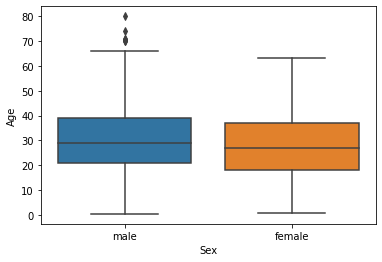

In [ ]:
#VALORE DELL'ETA MOLTO IMPORTANTE, ED è TRA I PIU MANCANTI
mean_age = dtrain["Age"].mean()
print('Età media:',mean_age)
#dtrain[["Sex","Age"]]
sns.boxplot(x="Sex", y="Age", data=dtrain)

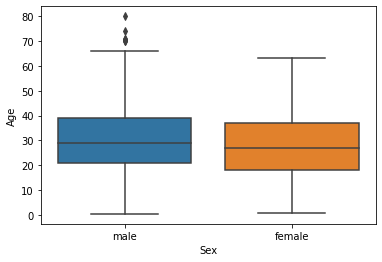

In [ ]:
sns.boxplot(x="Sex", y="Age", data=dtrain)

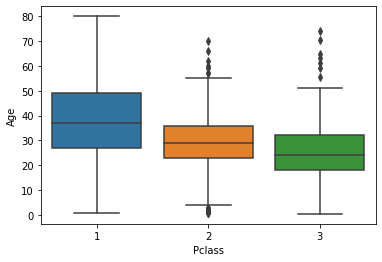

In [ ]:
sns.boxplot(x="Pclass", y="Age", data=dtrain)

ASSEGNARE L'ETA IN BASE ALLA PCLASS è MIGLIORE RISPETTO ALLE ALTRE DUE OPZIONI

In [ ]:
def fill_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
          return np.random.randint(28,50)
        
        elif Pclass == 2:
          return np.random.randint(25,35)
        
        else: 
          return np.random.randint(20,32)
        
    else:
      return Age

In [ ]:
dtrain["Age"] = dtrain[["Age", "Pclass"]].apply(fill_age, axis=1)

In [ ]:
dtrain.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

CONVERSIONE CATEGORIE TO NUMERIC PER POI FACILITAZIONE TRAINING

In [ ]:
sex = {"Sex": {"male":0, "female":1}}
dtrain = dtrain.replace(sex)

In [ ]:
embarked = {"Embarked": {"S":0, "C":1, "Q":2}}
dtrain = dtrain.replace(embarked)

In [ ]:
dtrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0.0


In [ ]:
#DROPPING FEATURES NON IMPORTANTI PER CLASSIFICATORE
col_drop = ["Name", "Ticket", "Cabin"]
dtrain.drop(col_drop, axis=1,inplace=True)
dtrain.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,0.0
1,2,1,1,1,38.0,1,0,71.2833,1.0
2,3,1,3,1,26.0,0,0,7.9250,0.0
3,4,1,1,1,35.0,1,0,53.1000,0.0
4,5,0,3,0,35.0,0,0,8.0500,0.0


In [ ]:
dtrain["Embarked"].fillna(1,inplace=True)

CREAZIONE MODELLO , PREDICT E VALUTAZIONE

In [ ]:
#SPLITTING DATASET PER IL MODELLO
data_x = dtrain[["PassengerId","Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]]

data_y = dtrain[["Survived"]] #target

X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.25, random_state=42)

In [ ]:
#POSSIBILI UTILIZZI : SVM, DECISION TREE, RANDOM FOREST, KNN, LINEAR-LOGISTIC REGRESSION

#UTILIZZO RANDOM FOREST

model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
rf_pred = model_rf.predict(X_test) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [ ]:
#accuracy
acc_rf = accuracy_score(y_test, rf_pred)
print('Accuracy:',acc_rf)

Accuracy: 0.820627802690583


In [ ]:
#TEST DATA
from google.colab import files
upload = files.upload()

Saving test.csv to test.csv


In [ ]:
dtest = pd.read_csv(io.BytesIO(upload['test.csv']))

In [ ]:
print("Shape",dtest.shape)
dtest.isnull().sum()

Shape (418, 11)


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
#REPLACING MISSING VALUE
dtest["Age"] = dtest[["Age", "Pclass"]].apply(fill_age, axis=1)
dtest.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
dtest["Fare"].fillna(dtest["Fare"].mean(), inplace=True)

In [ ]:
sex_test = {"Sex": {"male":0, "female":1}}
dtest = dtest.replace(sex_test)
embarked_test = {"Embarked": {"S":0, "C":1, "Q":2}}
dtest = dtest.replace(embarked_test)

In [ ]:
col_drop_test = ["Name", "Ticket", "Cabin"]
dtest.drop(col_drop_test, axis=1,inplace=True)
dtest.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,0,34.5,0,0,7.8292,2
1,893,3,1,47.0,1,0,7.0000,0
2,894,2,0,62.0,0,0,9.6875,2
3,895,3,0,27.0,0,0,8.6625,0
4,896,3,1,22.0,1,1,12.2875,0


In [ ]:
#TEST MODELLO SUL TEST DATASET
y_pred_test = model_rf.predict(dtest)

SUBMISSION

In [ ]:
orginal_data_test = pd.read_csv('/content/test.csv')
sub = pd.DataFrame({
    "PassengerId": orginal_data_test["PassengerId"],
    "Survived": y_pred_test
})

In [ ]:
sub.head(20)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [ ]:
sub.to_csv(r"submission.csv", index=False)